## Модель кластеризации KMeans

## Алгоритм K-means (K-средних)<a class='anchor' id='kmeans'>

Вначале сгенерируем три облака точек с помощью `sklearn`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=10)

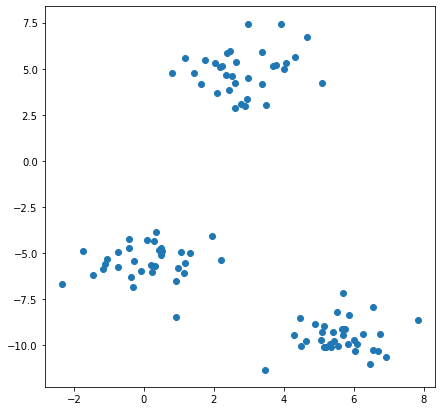

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

### Инициализируем центроиды

Алгоритм построения:

1. Выбрать количество кластеров $k$, на которые будут делиться данные.


In [ ]:
k = 3

2. Случайным образом выбрать в пространстве данных $k$ точек $c_{k}$ (центроидов) - центров будущих кластеров.



In [ ]:
np.random.seed(0)
centroid_ids = np.random.choice(X.shape[0], k, replace=False)
centroid_ids

array([26, 86,  2])

In [ ]:
centroids = X[centroid_ids]
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

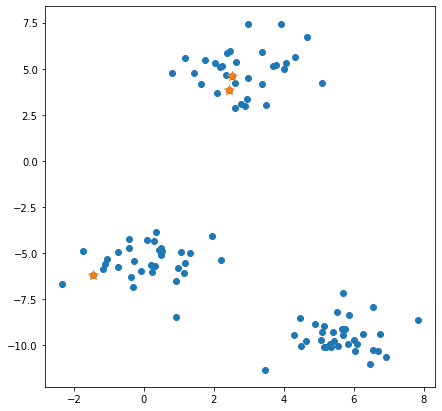

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100);


3. Для каждой точки из выборки посчитать, к какому из центроидов она ближе.

В качестве метрики расстояния будем использовать евклидово расстояние

$$\sqrt{\sum{(x_1 - x_2)^2}}$$

In [ ]:
colors = ['green', 'orange', 'red']

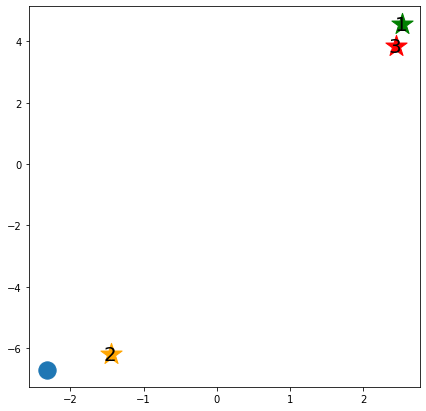

In [ ]:
idx_1 = 0
plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300)

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [ ]:
np.linalg.norm(centroids - X[idx_1], axis=1)

array([12.27614681,  1.01564584, 11.5742295 ])

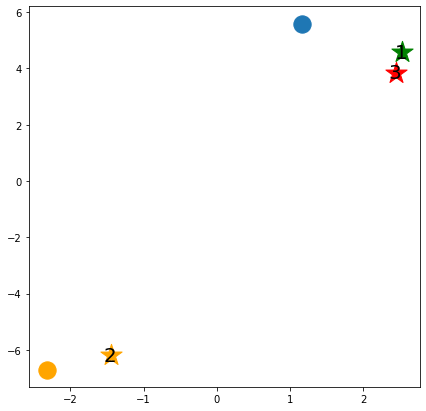

In [ ]:
idx_2 = 11

plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300, c=colors[1])
plt.scatter(X[idx_2, 0], X[idx_2, 1], s=300)

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [ ]:
np.linalg.norm(centroids - X[idx_2], axis=1)

array([ 1.70360812, 12.06653963,  2.16731949])

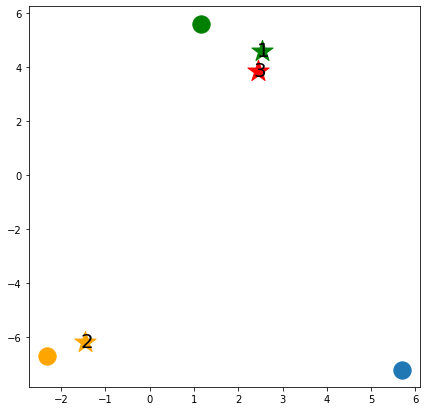

In [ ]:
idx_3 = 9

plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300, c=colors[1])
plt.scatter(X[idx_2, 0], X[idx_2, 1], s=300, c=colors[0])
plt.scatter(X[idx_3, 0], X[idx_3, 1], s=300)

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [ ]:
np.linalg.norm(centroids - X[idx_3], axis=1)

array([12.1935543 ,  7.21525378, 11.51453993])

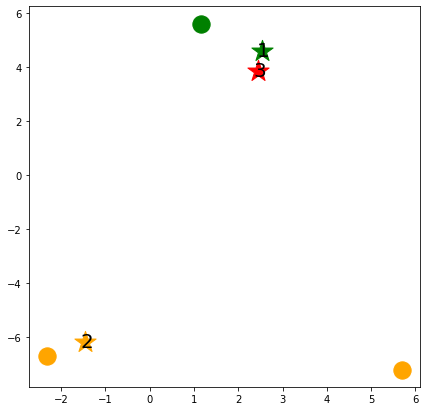

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300, c=colors[1])
plt.scatter(X[idx_2, 0], X[idx_2, 1], s=300, c=colors[0])
plt.scatter(X[idx_3, 0], X[idx_3, 1], s=300, c=colors[1])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

#### Первая итерация обучения

Создадим словарь для кластеризации

In [ ]:
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [ ]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    cluster_ind = distances.argmin()
    clusters[cluster_ind].append(x)

clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.37979515, 4.18880872]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([2.61105267, 4.22218469]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array

In [ ]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(25, 67, 8)

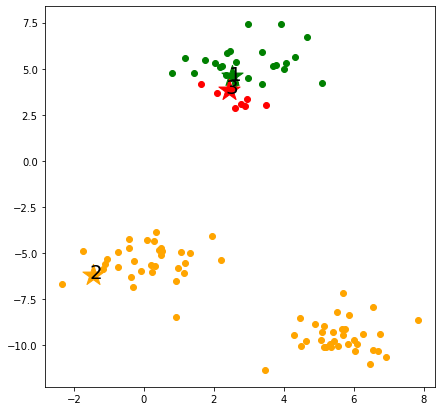

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);


4. Переместить каждый центроид в центр выборки, отнесенной к этому центроиду, определив его как среднее арифметическое всех точек кластера:

$$c_{k} = \frac{\sum_{i=1}^{l}[a(x_{i})=k]x_{i}}{\sum_{i=1}^{l}[a(x_{i}) = k]}.$$


Пересчитаем центроиды как среднее по кластерам


In [ ]:
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

In [ ]:
new_centroids = {}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

new_centroids

{0: array([2.91329082, 5.33493484]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.61305824, 3.369246  ])}

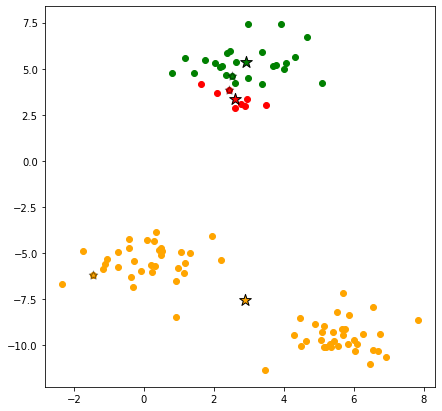

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], s=80, c=colors[i], marker='*', alpha=0.5, edgecolors='black')

for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], marker='*', s=150, c=colors[i], edgecolors='black')

#### Вторая итерация обучения


5. Повторить шаги 3-4 до сходимости алгоритма (обычно это оценивается по величине смещения центроида после каждого шага - сходимость означает непревышение смещения какого-то заданного значения).

In [ ]:
new_centroids = dict(sorted(new_centroids.items()))
new_centroids = np.array(list(new_centroids.values()))
centroids = new_centroids.copy()
centroids

array([[ 2.91329082,  5.33493484],
       [ 2.89504171, -7.53408753],
       [ 2.61305824,  3.369246  ]])

In [ ]:
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [ ]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    cluster_ind = distances.argmin()
    clusters[cluster_ind].append(x)

clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array([  6.04774884, -10.30504657]),
  array([-0.42084194, -4.24889336]),
 

In [ ]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(23, 67, 10)

In [ ]:
new_centroids = {}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

new_centroids

{0: array([2.90614881, 5.43314686]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.68953138, 3.53649614])}

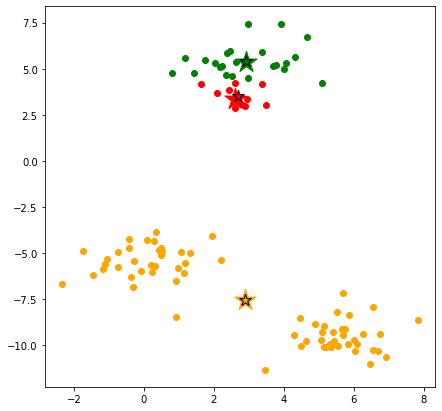

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])

for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], marker='*', s=150, c=colors[i], edgecolors='black')

### Функция для обучения KMeans

In [ ]:
from tqdm import tqdm

def KMeans(X, k=3, num_iter=10):
    np.random.seed(0)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in tqdm(range(num_iter)):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))
        centroids = new_centroids.copy()

    return centroids, clusters

In [ ]:
centroids, clusters = KMeans(X)
centroids

100%|██████████| 10/10 [00:00<00:00, 525.94it/s]


array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

In [ ]:
clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array([  6.04774884, -10.30504657]),
  array([-0.42084194, -4.24889336]),
 

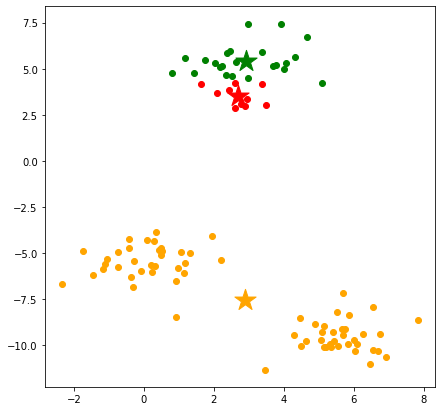

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])

### Функция для обучения KMeans с критерием останова

In [ ]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0):
    np.random.seed(seed)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        print(len(clusters[0]), len(clusters[1]), len(clusters[2]))
        print(new_centroids)

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [ ]:
centroids, clusters = KMeans(X)
centroids

25 67 8
[[ 2.91329082  5.33493484]
 [ 2.89504171 -7.53408753]
 [ 2.61305824  3.369246  ]]
23 67 10
[[ 2.90614881  5.43314686]
 [ 2.89504171 -7.53408753]
 [ 2.68953138  3.53649614]]
23 67 10
[[ 2.90614881  5.43314686]
 [ 2.89504171 -7.53408753]
 [ 2.68953138  3.53649614]]
stopping at iter 2


array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

In [ ]:
centr1 = np.array([[ 2.91329082,  5.33493484],
                   [ 2.89504171, -7.53408753],
                   [ 2.61305824,  3.369246  ]])
centr2 = np.array([[ 2.90614881,  5.43314686],
                   [ 2.89504171, -7.53408753],
                   [ 2.68953138,  3.53649614]])
centr3 = np.array([[ 2.90614881,  5.43314686],
                   [ 2.89504171, -7.53408753],
                   [ 2.68953138,  3.53649614]])

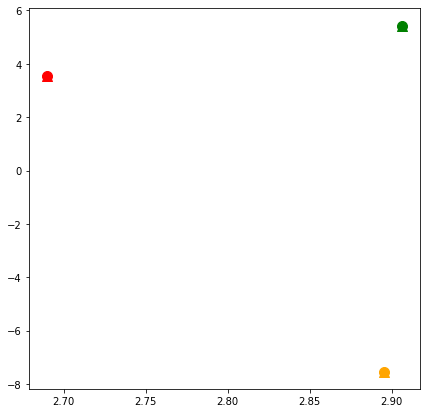

In [ ]:
plt.figure(figsize=(7, 7))

for i, centr in enumerate(centr1):
    # plt.scatter(centr1[i][0], centr1[i][1], marker='*', s=100, c=colors[i])
    plt.scatter(centr2[i][0], centr2[i][1], marker='^', s=100, c=colors[i])
    plt.scatter(centr3[i][0], centr3[i][1], marker='o', s=100, c=colors[i])

In [ ]:
np.linalg.norm(centr2[0] - centr3[0])

0.0

Поменяем seed для другой инициализации стартовых центроид

In [ ]:
centroids, clusters = KMeans(X, seed=1)
centroids

26 66 8
[[  5.29660654  -9.38045292]
 [  1.46485965  -0.3030066 ]
 [  6.66400306 -10.07078922]]
29 61 10
[[ 4.49298218 -8.90049529]
 [ 1.50550525  0.21865431]
 [ 6.55722276 -9.96800753]]
33 48 19
[[ 2.34915724 -7.50785928]
 [ 1.95733764  1.86223045]
 [ 6.11737555 -9.79390688]]
33 33 34
[[ 0.08921213 -5.46441742]
 [ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]]
33 33 34
[[ 0.08921213 -5.46441742]
 [ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]]
stopping at iter 4


array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

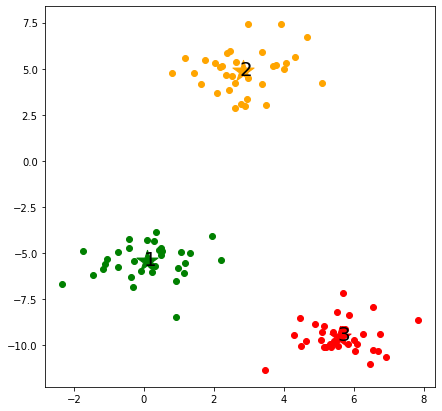

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

Хотелось бы не перебирать случайность, пока не повезет, а иметь другой более умный способ инициализации центроид - это KMeans++

## KMeans в sklearn

In [ ]:
from sklearn.cluster import KMeans as sk_KMeans

model = sk_KMeans(n_clusters=3,
                  init='k-means++',
                  max_iter=10,
                  random_state=0)

model.fit(X)

KMeans(max_iter=10, n_clusters=3, random_state=0)

In [ ]:
labels = model.predict(X)
labels[:10]

array([1, 1, 0, 2, 0, 0, 2, 1, 0, 2], dtype=int32)

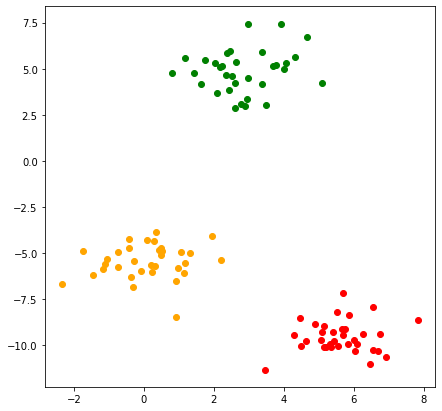

In [ ]:
plt.figure(figsize=(7, 7))

for i in range(len(labels)):
    plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]])

In [ ]:
model.cluster_centers_

array([[ 2.84050716,  4.85840422],
       [ 0.08921213, -5.46441742],
       [ 5.6183469 , -9.54288499]])

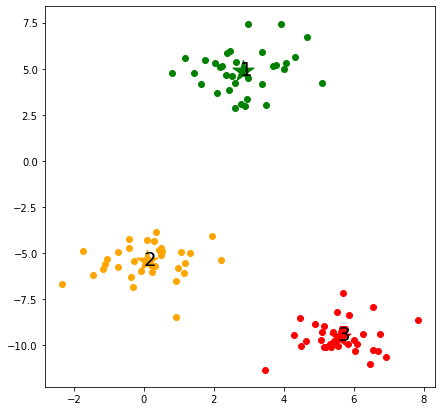

In [ ]:
plt.figure(figsize=(7, 7))

for i in range(len(labels)):
    plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]])

for i, centr in enumerate(model.cluster_centers_):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);